In [73]:
# Question 1
import matplotlib.pyplot as plt
import pandas as pd
from ucimlrepo import fetch_ucirepo 

%matplotlib inline

computer_hardware = fetch_ucirepo(id=29) 
print(computer_hardware.data.features)
ds = computer_hardware.data.features

# This data set is a set of processor performance data across different models and vendors. It was compiled in 1987 and
# provides insight into the processor improvements of that era. The most notible value of this data set is the published
# relative performance of the given processor. 

    VendorName      ModelName  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP
0      adviser          32/60   125   256   6000   256     16    128  198  199
1       amdahl         470v/7    29  8000  32000    32      8     32  269  253
2       amdahl        470v/7a    29  8000  32000    32      8     32  220  253
3       amdahl        470v/7b    29  8000  32000    32      8     32  172  253
4       amdahl        470v/7c    29  8000  16000    32      8     16  132  132
..         ...            ...   ...   ...    ...   ...    ...    ...  ...  ...
204     sperry           80/8   124  1000   8000     0      1      8   42   37
205     sperry  90/80-model-3    98  1000   8000    32      2      8   46   50
206     sratus             32   125  2000   8000     0      2     14   52   41
207       wang         vs-100   480   512   8000    32      0      0   67   47
208       wang          vs-90   480  1000   4000     0      0      0   45   25

[209 rows x 10 columns]


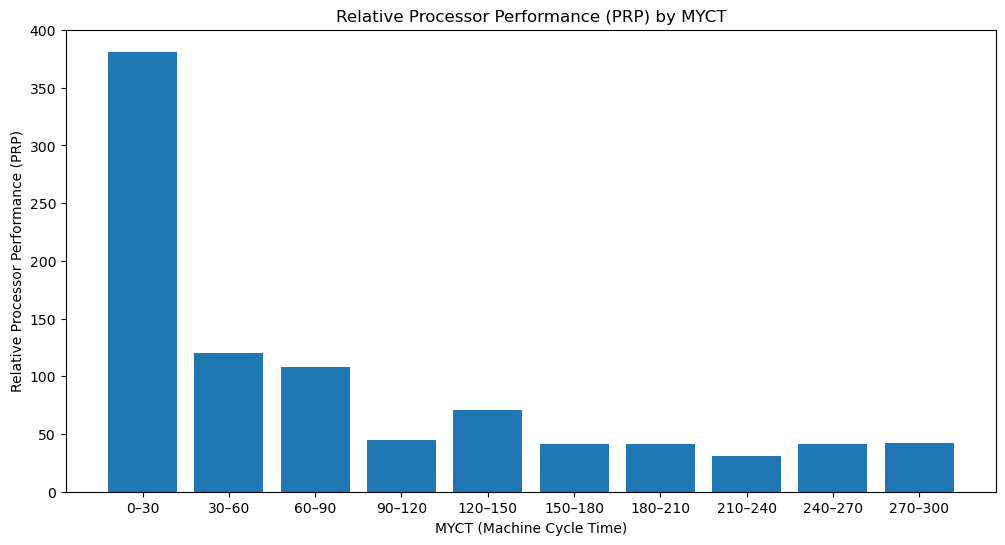

In [74]:
# Question 2

# Create bins and labels for machine cycles in 30ns intervals.
bins = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300]
labels = [
    '0–30', '30–60', '60–90', '90–120', '120–150',
    '150–180', '180–210', '210–240', '240–270', '270–300'
]

# Create a group of the MYCT data.
group = pd.cut(ds['MYCT'], bins=bins, labels=labels, include_lowest=True)

# Group by mean of PRP.
group_mean = ds.groupby(group, observed=False)['PRP'].mean()

# Create bar graph.
plt.figure(figsize=(12, 6)) # Resize to allow all values to fit.
plt.bar(group_mean.index.astype(str), group_mean.values)

plt.title('Relative Processor Performance (PRP) by MYCT')
plt.xlabel('MYCT (Machine Cycle Time)')
plt.ylabel('Relative Processor Performance (PRP)')
plt.savefig('ZacharyWarsalla + Relative Processor Performance (PRP) by MYCT')
plt.show()


# This bar graph shows the relative processor performance and its relation to
# the machine cycle time (MYCT). Notice that processors with a (MYCT) of 0-30ns
# have the best performance. More interestingly notice that after 30ns the decrease
# in relative performance reduces causing the performance to level out between ~150-300ns.

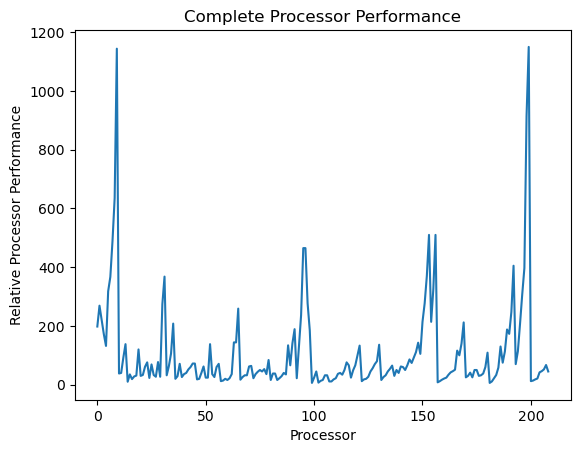

In [75]:
# Question 3
# Plot out just the PRP values.
plt.plot(ds['PRP'])

plt.title('Complete Processor Performance')
plt.xlabel('Processor')
plt.ylabel('Relative Processor Performance')
plt.savefig('ZacharyWarsalla + Complete Processor Performance.png')
plt.show()

# This line graph represents all the relative performance values recorded in the data set.
# This shows us the outliers and expected values recorded in the data set. Notice specifially 
# the two values which peak at over a 1000 score. Also notice how a majority of the values recored 
# are below 200 points. The outliers may be counter productive in certain tasks such as finding
# the average performance of a processor from the era this data set is from.

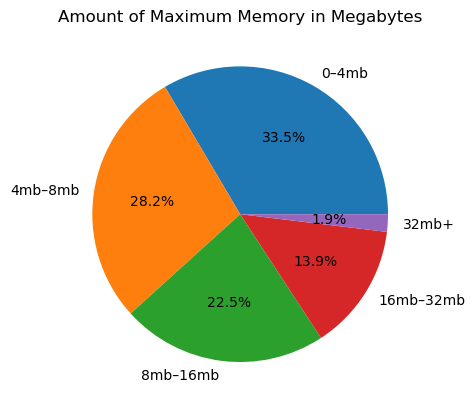

In [76]:
# Question 4

# Create bins and labels for memory in mb.
bins = [0, 4000, 8000, 16000, 32000, float('inf')]
labels = ['0–4mb', '4mb–8mb', '8mb–16mb', '16mb–32mb', '32mb+']

# Create group of the binned data.
ds['max_group'] = pd.cut(ds['MMAX'], bins=bins, labels=labels)

# Count up each group.
group_counts = ds['max_group'].value_counts().sort_index()

# Plot the pie chart.
plt.pie(group_counts, labels=group_counts.index, autopct='%1.1f%%')
plt.title('Amount of Maximum Memory in Megabytes')
plt.savefig('ZacharyWarsalla + Amount of Maximum Memory in Megabytes.png')
plt.show()

# This pie chart shows the groups of maximum memory in megabytes for processors of
# the era of this data set. The chart tells us that 0-4mb of memory was most common
# for the era and that 32mb+ was the rarest. This is not all we can intepret 
# from this chart however. Notice the difference between each group, 0-4mb to 
# 4mb-8mb and so forth, increases as we reach 32mb+. This shows us that 
# higher maximum amounts of memory would be increasingly more rare. 

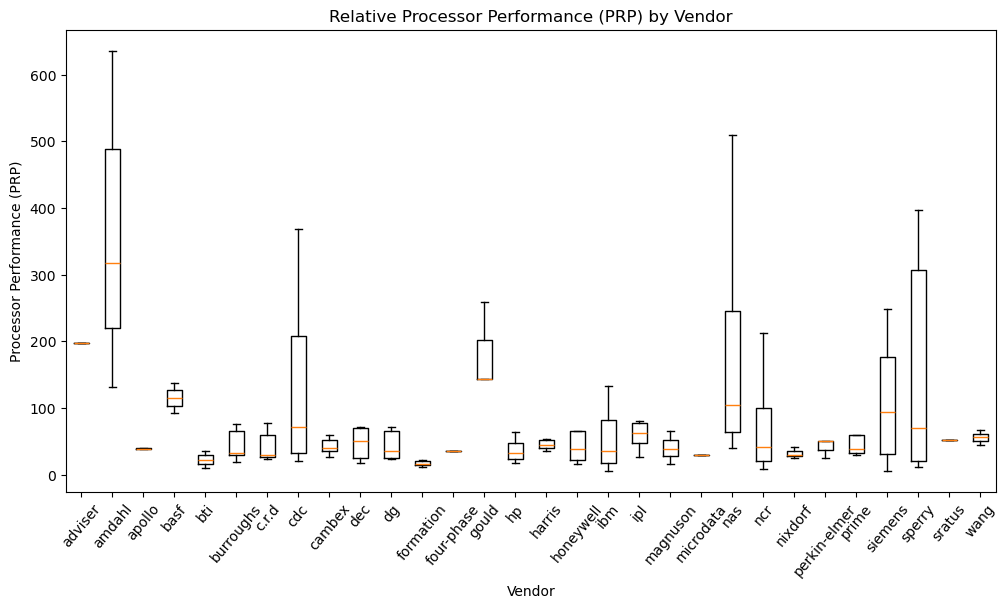

In [77]:
# Question 5

# Get each individual vendor name from the list.
vendors = ds['VendorName'].unique()

# Group by vendor name and PRP.
grouped_data = [ds.loc[ds['VendorName'] == vendor, 'PRP'] for vendor in vendors]

# Plot boxplot without outliers.
plt.figure(figsize=(12, 6))  # Adjust size for better readability.
plt.boxplot(grouped_data, tick_labels=vendors, vert=True, showfliers=False)

plt.title('Relative Processor Performance (PRP) by Vendor')
plt.xlabel('Vendor')
plt.ylabel('Processor Performance (PRP)')
plt.xticks(rotation=50) # Rotate vendor names for readability.
plt.savefig('ZacharyWarsalla + Relative Processor Performance (PRP) by Vendor.png')
plt.show()

# This box graph shows the proccessor performance minimums, maximums, quartiles and means of 
# each vendor. Notice the vendor with the highest mean and quartile performances is amdalh. 